<a href="https://colab.research.google.com/github/Somcodo4/using-study-hours-and-attendance-to-predict-exam-scores-via-ANN./blob/main/using_study_hours_and_attendance_to_predict_exam_scores_via_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [56]:
#using study hours and attendance to predict exam scores
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import StandardScaler

In [57]:
from sklearn.model_selection import train_test_split

In [58]:
from sklearn.metrics import mean_squared_error, r2_score

In [59]:
import pandas as pd
import numpy as np

# Importing necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline

In [60]:
# Load the correlated dataset
correlated_students_data = pd.read_csv('correlated_class_grade_for_prediction.csv')



In [61]:
# Load dataset from CSV file
df=pd.read_csv('correlated_class_grade_for_prediction.csv')

In [62]:
df.head()

,Study_Hours_per_Week,Attendance_Percentage,Exam_Score
0,33,78.943245,50.0
1,19,71.923706,50.0
2,12,83.601307,50.0
3,25,66.407633,50.0
4,23,57.752081,50.0


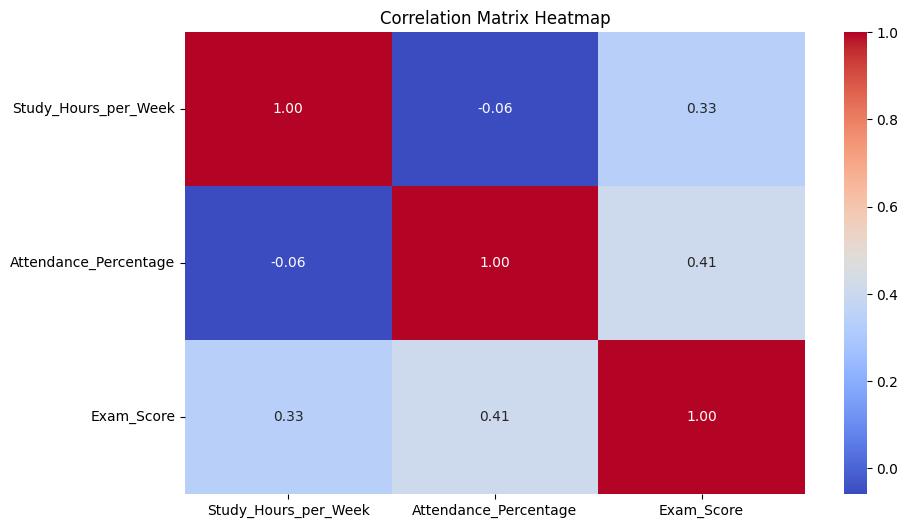

In [63]:
# Calculate the Correlation Matrix
correlation_matrix = correlated_students_data.corr()

# Visualize the Correlation Matrix
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix Heatmap')
plt.show()

In [64]:
# Define features and target
X = correlated_students_data[['Study_Hours_per_Week', 'Attendance_Percentage']]
y = correlated_students_data['Exam_Score']

In [65]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

In [66]:


# Build the Neural Network model
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))  # Hidden layer with 64 neurons
model.add(Dense(32, activation='relu'))  # Hidden layer with 32 neurons
model.add(Dense(1, activation='linear'))  # Output layer (predicting exam score)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [67]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=500, validation_data=(X_test, y_test), verbose=1)

# Evaluate the model on the test set
mse_nn = model.evaluate(X_test, y_test)

# Predict on the test set
y_pred_nn = model.predict(X_test)

Epoch 1/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 2636.3237 - val_loss: 2574.3938
Epoch 2/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2583.0051 - val_loss: 2550.0791
Epoch 3/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 2545.1316 - val_loss: 2523.7231
Epoch 4/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2527.6980 - val_loss: 2494.2185
Epoch 5/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2465.9998 - val_loss: 2459.9509
Epoch 6/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2452.9612 - val_loss: 2420.0005
Epoch 7/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 2393.5186 - val_loss: 2373.2144
Epoch 8/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2340.4214 - val_loss: 2318.2749
Epoch 9/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2307.7959 - val_loss: 2253.6851
Epoch 10/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2200.4795 - val_loss: 2179.1917
Epoch 11/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2169.0769 - val_loss: 2093.6541
Epoch 12/500
7/7 

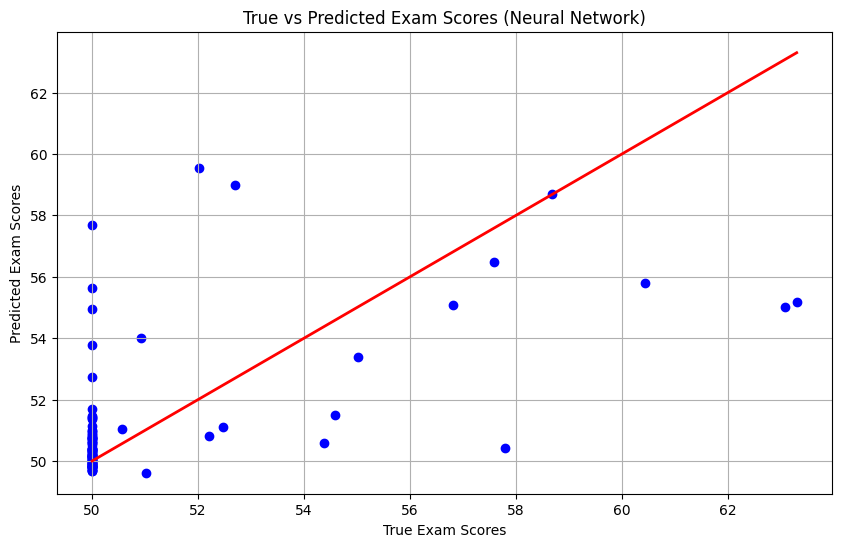

In [68]:
# Plot: True vs Predicted Exam Scores (Neural Network)
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_nn, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2)  # Perfect prediction line
plt.xlabel('True Exam Scores')
plt.ylabel('Predicted Exam Scores')
plt.title('True vs Predicted Exam Scores (Neural Network)')
plt.grid(True)
plt.show()

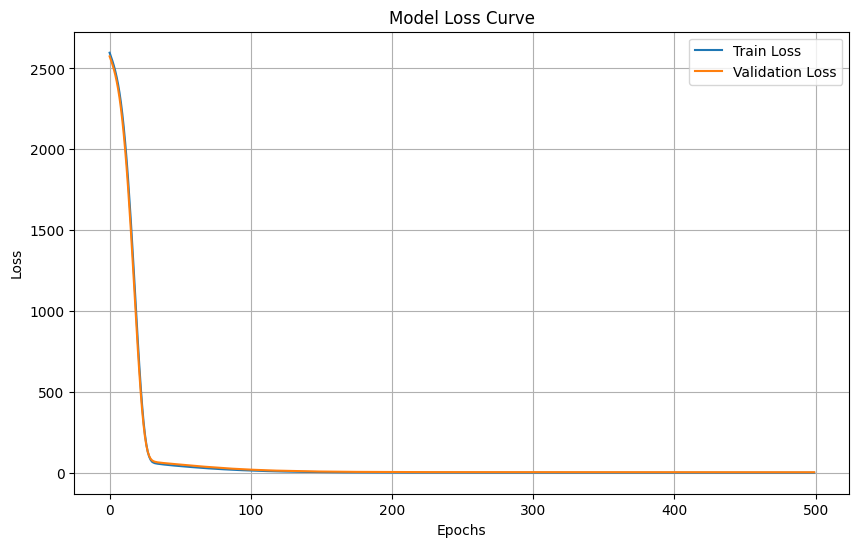

5.6606831550598145

In [69]:
# Plot the loss curve
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss Curve')
plt.legend()
plt.grid(True)
plt.show()

# Print the Mean Squared Error of the Neural Network
mse_nn


In [70]:


# Evaluate the model on the test set
mse_nn = model.evaluate(X_test, y_test)

# Predict on the test set
y_pred_nn = model.predict(X_test)

# Calculate Mean Squared Error and R-squared
mse_nn = mean_squared_error(y_test, y_pred_nn)
r2_nn = r2_score(y_test, y_pred_nn)

# Print Mean Squared Error and R-squared
print(f'Mean Squared Error (MSE): {mse_nn}')
print(f'R-squared (R²): {r2_nn}')

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 5.9656 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Mean Squared Error (MSE): 5.6606836236512335
R-squared (R²): 0.2608079929921123


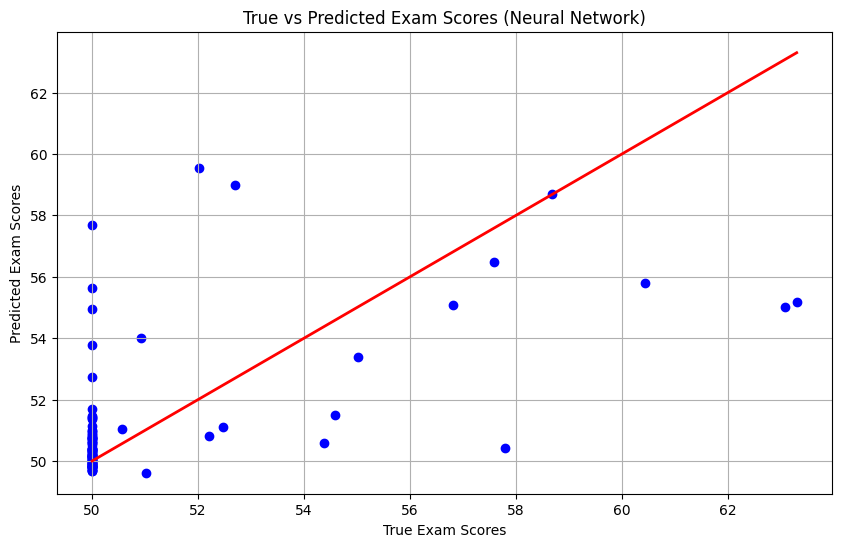

In [71]:
# Plot: True vs Predicted Exam Scores (Neural Network)
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_nn, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2)  # Perfect prediction line
plt.xlabel('True Exam Scores')
plt.ylabel('Predicted Exam Scores')
plt.title('True vs Predicted Exam Scores (Neural Network)')
plt.grid(True)
plt.show()

In [72]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import time

# Measure the training time
start_train = time.time()
history = model.fit(X_train, y_train, epochs=300, validation_data=(X_test, y_test), verbose=0)
end_train = time.time()
training_time = end_train - start_train

# Measure the prediction time
start_pred = time.time()
y_pred_nn = model.predict(X_test)
end_pred = time.time()
prediction_time = end_pred - start_pred

# Calculate performance metrics
mse_nn = mean_squared_error(y_test, y_pred_nn)
rmse_nn = np.sqrt(mse_nn)
mae_nn = mean_absolute_error(y_test, y_pred_nn)

# Display performance metrics
print(f"Training Time: {training_time:.4f} seconds")
print(f"Prediction Time: {prediction_time:.4f} seconds")
print(f"MSE: {mse_nn:.4f}")
print(f"RMSE: {rmse_nn:.4f}")
print(f"MAE: {mae_nn:.4f}")


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Training Time: 52.9544 seconds
Prediction Time: 0.1907 seconds
MSE: 5.5932
RMSE: 2.3650
MAE: 1.2823


In [73]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import time
import numpy as np

# Measure the training time
start_train = time.time()
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test), verbose=0)
end_train = time.time()
training_time = end_train - start_train

# Measure the prediction time
start_pred = time.time()
y_pred_nn = model.predict(X_test)
end_pred = time.time()
prediction_time = end_pred - start_pred

# Calculate performance metrics
mse_nn = mean_squared_error(y_test, y_pred_nn)
rmse_nn = np.sqrt(mse_nn)
mae_nn = mean_absolute_error(y_test, y_pred_nn)
r2_nn = r2_score(y_test, y_pred_nn)

# Display performance metrics
print(f"Training Time: {training_time:.4f} seconds")
print(f"Prediction Time: {prediction_time:.4f} seconds")
print(f"MSE: {mse_nn:.4f}")
print(f"RMSE: {rmse_nn:.4f}")
print(f"MAE: {mae_nn:.4f}")
print(f"R-squared: {r2_nn:.4f}")


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Training Time: 44.3243 seconds
Prediction Time: 0.0962 seconds
MSE: 5.6198
RMSE: 2.3706
MAE: 1.2787
R-squared: 0.2661


In [78]:
# Function to make predictions based on Study Hours per Week and Attendance Percentage
def predict_exam_score(study_hours, attendance_percentage):
    # Prepare the input in the same format used during training (scaled)
    input_data = np.array([[study_hours, attendance_percentage]])
    input_data_scaled = scaler.transform(input_data)

    # Make the prediction using the trained neural network model
    predicted_score = model.predict(input_data_scaled)[0][0]

    return predicted_score

# Example: Input features for prediction
study_hours = 27  # Example: Student studies 30 hours per week
attendance_percentage = 99.09  # Example: Student has 85% attendance

# Predict the exam score based on the input features
predicted_exam_score = predict_exam_score(study_hours, attendance_percentage)

print(f"Predicted Exam Score: {predicted_exam_score:.2f}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Predicted Exam Score: 55.26


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
